In [46]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

from datetime import datetime,timedelta

from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt

from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

## Reading Data

In [4]:
data=pd.read_csv('AirPassenger.csv',parse_dates=['Year-Month'],index_col='Year-Month')
data.head()

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Plotting Time Series

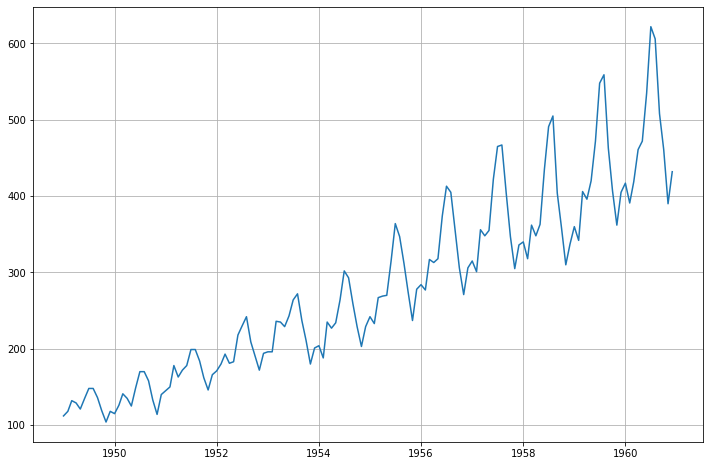

In [12]:
plt.figure(figsize=(12,8))
plt.grid()
plt.plot(data)

## Train Test Split

In [15]:
data.tail(24)

,Pax
Year-Month,
1959-01-01,360
1959-02-01,342
1959-03-01,406
1959-04-01,396
1959-05-01,420
1959-06-01,472
1959-07-01,548
1959-08-01,559
1959-09-01,463


In [17]:
train_end=datetime(1959,1,1)

In [21]:
train=data[:train_end]
test=data[train_end+timedelta(1):]

In [24]:
train.shape,test.shape


((121, 1), (23, 1))

## Decomposing Data Set

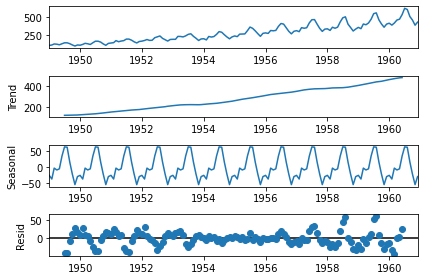

In [28]:
seasonal_decompose(data).plot();

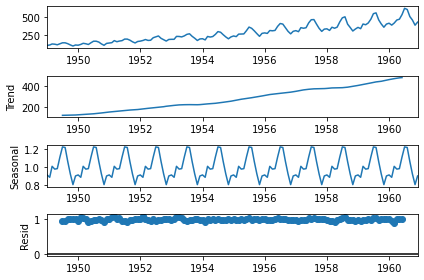

In [30]:
seasonal_decompose(data,model='multiplicative').plot();

## Exponential Smoothing Techniques

### Double Exponential smooting

In [32]:
model_DES=Holt(train,exponential=True,initialization_method='estimated')
model_DES_fit=model_DES.fit(optimized=True)

C:\Users\nehal\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [33]:
model_DES_fit.summary()

Dep. Variable:,Pax,No. Observations:,121
Model:,Holt,SSE,101265.163
Optimized:,True,AIC,822.295
Trend:,Multiplicative,BIC,833.478
Seasonal:,None,AICC,823.031
Seasonal Periods:,None,Date:,"Fri, 03 Sep 2021"
Box-Cox:,False,Time:,16:44:04
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
smoothing_trend,0.0001,beta,True


In [35]:
forecast=model_DES_fit.forecast(steps=len(test))
forecast

1959-02-01    366.162463
1959-03-01    372.519713
1959-04-01    378.987336
1959-05-01    385.567249
1959-06-01    392.261401
1959-07-01    399.071776
1959-08-01    406.000391
1959-09-01    413.049300
1959-10-01    420.220591
1959-11-01    427.516388
1959-12-01    434.938854
1960-01-01    442.490187
1960-02-01    450.172626
1960-03-01    457.988445
1960-04-01    465.939962
1960-05-01    474.029531
1960-06-01    482.259550
1960-07-01    490.632457
1960-08-01    499.150734
1960-09-01    507.816903
1960-10-01    516.633532
1960-11-01    525.603235
1960-12-01    534.728667
Freq: MS, dtype: float64

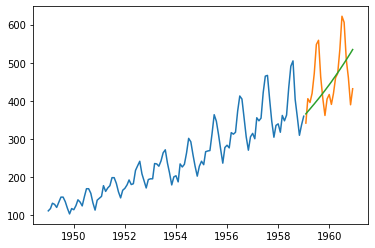

In [39]:
plt.plot(train)
plt.plot(test)
plt.plot(forecast)

## Triple Exponential Smoothing

In [40]:
model_TES=ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
model_TES_fit=model_TES.fit(optimized=True)

C:\Users\nehal\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [44]:
model_TES_fit.summary()

Dep. Variable:,Pax,No. Observations:,121
Model:,ExponentialSmoothing,SSE,16067.020
Optimized:,True,AIC,623.537
Trend:,Additive,BIC,668.269
Seasonal:,Additive,AICC,630.243
Seasonal Periods:,12,Date:,"Fri, 03 Sep 2021"
Box-Cox:,False,Time:,16:52:29
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2383406,alpha,True
smoothing_trend,4.432e-09,beta,True


In [42]:
forecast_TES=model_TES_fit.forecast(steps=len(test))

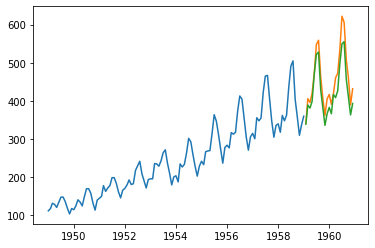

In [43]:
plt.plot(train)
plt.plot(test)
plt.plot(forecast_TES)

## Model Performance

In [52]:
mean_squared_error(test.values,forecast.values,squared=False)

75.80787807904069

In [49]:
mean_squared_error(test.values,forecast_TES.values,squared=False)

35.84450653583415

In [51]:
mean_absolute_percentage_error(test.values,forecast_TES.values)*100

6.683827064756464

In [53]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

MAPE(test['Pax'],forecast_TES)

6.683827064756464